<a href="https://colab.research.google.com/github/LZY199/PracticalAI/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Generate Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SEED = 1234
NUM_SAMPLES = 50

# Set seend for reproducibility
np.random.seed(SEED)

# Generate synthetic data
def generate_data(num_samples):
  """Generate dummy data for linear regression."""
  X = np.array(range(num_samples))
  noise = np.random.uniform(-10, 20, size=num_samples)
  y = 3.5*X + noise
  return X, y

# Generate randome(linear data)
X,y = generate_data(NUM_SAMPLES)
data = np.vstack((X,y)).T
print(data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [6]:
# Load into a Pandas DataFrame
df = pd.DataFrame(data, columns=['X', 'y'])
X = df[['X']].values
y = df[['y']].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


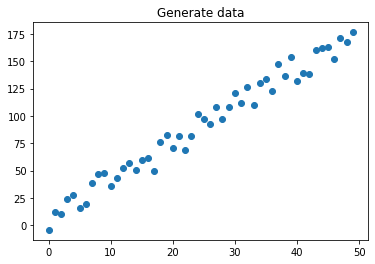

In [7]:
# Scatter Plot
plt.title("Generate data")
plt.scatter(x=df['X'], y=df['y'])
plt.show()

## **Numpy**
Data is already prepared. Going to first implement linear regression using just Numpy.  

## **Split Data**
Split dataset into three sets: train, validation and test data splits.


*   train: used to train model.
*   val: used to validate our model's performance during training.
*   test: used to do an evaluation of our fully trained model.





In [9]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

# Shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Split indices
train_start = 0
train_end = int(TRAIN_SIZE * NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE + VAL_SIZE)* NUM_SAMPLES)
test_start = val_end
test_end = NUM_SAMPLES

# Split Data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:test_end]
y_test = y[test_start:test_end]

print(f"X_train:{X_train.shape}, y_train:{y_train.shape}")
print(f"X_val:{X_val.shape}, y_val:{y_val.shape}")
print(f"X_test:{X_test.shape}, y_test:{y_test.shape}")

X_train:(35, 1), y_train:(35, 1)
X_val:(7, 1), y_val:(7, 1)
X_test:(8, 1), y_test:(8, 1)


## **Standardize data**

In [10]:
def standardize_data(data, mean, std):
  return (data-mean)/std

# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

Need to treat the validation and test sets as if they were hidden datasets. So only use the train set to determine the mean and std to avoid biasing our training process.

In [ ]:
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

# Check (mean should be about 0 and std shoulb be about 1)

